<html>
  <body>
      <h2>Linear Regression</h2>
      <h3>Q1.3. Implement a model using linear regression to predict the probablity of getting the admit. Compare the performance of Mean square error loss function vs Mean Absolute error function vs Mean absolute percentage error function and explain the reasons for the observed behaviour</h3>
      <p>Here we train the Admission dataset using linear regression.</p>
    </body>
</html>

In [1]:
import pandas as pd
import numpy as np
import operator
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("admission_data.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']],
    data[['Chance of Admit']],
    test_size=0.2,
    random_state=0)

In [4]:
for col in X_train:
    mean = X_train[col].mean()
    std = X_train[col].std()
    X_train[col] = (X_train[col] - mean)/std
    X_test[col] = (X_test[col]-mean)/std


In [5]:
X_train['Ones'] = [1]*len(X_train)
X_test['Ones'] = [1]*len(X_test)

<html>
  <body>
    <p>First, we hypothesize the dataset using a linear model. We predict that the data follows a linear curve and compute the error based on our hypothesis.</p>
    <p>The following is the hypothesis. Since there are 7 features, we have a total of 8 coefficients.</p>
    $$h(\theta ) = {x _{7}}{\theta _{7}}+{x _{6}}{\theta _{6}}+{x _{5}}{\theta _{5}}+{x _{4}}{\theta _{4}}+{x _{3}}{\theta _{3}}+{x _{2}}{\theta _{2}}+{x _{1}}{\theta _{1}}+{\theta _{0}} $$
    <p>We compare the performance of 3 different error functions. They are:</p>
    <ol>
      <li>Mean Square Error</li>
      <li>Mean Absolute Error</li>
      <li>Mean Absolute Percentage Error</li>
    </ol>
    <p>The below are the formula for the error functions mentioned above</p>
    <p><b>Mean Square Error</b></p>
    $$L(\theta ) = \frac{1}{m}\sum_{i=1}^{m}(h(\theta)-y)^{2}$$
    <p><b>Mean Absolute Error</b></p>
    $$L(\theta ) = \frac{1}{m}\sum_{i=1}^{m}\left |h(\theta)-y  \right |$$
    <p><b>Mean Absolute Percentage Error</b></p>
    $$L(\theta ) = \frac{100}{m}\sum_{i=1}^{m}\left |\frac{h(\theta)-y}{y}  \right |$$
    <p>We use the gradient descent optimizer to minimize the loss function. Below is the formula for gradient descent:</p>
    $$\theta_{next} = \theta_{current} - \alpha \frac{\delta L(\theta )}{\delta \theta }$$
    <p>From the above formula we can see that we need to take the derivative of the loss function. The following are the derivative of various loss functions mentioned above.</p>
    <p><b>Mean Square Error</b></p>
    $$\frac{\delta L(\theta )}{\delta \theta} = \frac{1}{m}\sum_{i=1}^{m}(h(\theta)-y)x$$
    <p><b>Mean Absolute Error</b></p>
    $$\frac{\delta L(\theta )}{\delta \theta} = \frac{1}{m}\sum_{i=1}^{m} \frac{h(\theta)-y}{\left | y-h(\theta ) \right |}x$$
    <p><b>Mean Absolute Percentage Error</b></p>
    $$\frac{\delta L(\theta )}{\delta \theta} = \frac{h(\theta)-y}{y^{2}\left | \frac{h(\theta )}{y}-1 \right |}x$$
    
  </body>
</html>

In [6]:
class LinearRegression:
    theta = None
    
    def predict(self, X):
        Y_pred = np.dot(X.values,self.theta.T)
        return Y_pred
    
    def compute_error(self, y_pred, y_actual, error_function):
        m = len(y_actual)
        if error_function == 'mean_squared_error':
            error = (1.0/float(m))*np.sum((y_pred-y_actual)*(y_pred-y_actual))
        elif error_function == 'mean_absolute_error':
            error = (1.0/float(m))*np.sum(np.absolute(y_pred-y_actual))
        elif error_function == 'mean_absolute_percentage_error':
            error = (1.0/float(m))*np.sum(np.absolute(np.divide((y_pred-y_actual),y_actual)))
        return error
    
    def compute_gradient(self, X, h, Y, error_function):
        m = len(Y)
        if error_function == 'mean_squared_error':
            grad = (2.0/float(m))*np.sum(X*(h-Y), axis=0)
        elif error_function == 'mean_absolute_error':
            grad = (1.0/float(m))*np.sum(X*np.divide(h-Y, np.absolute(Y-h)),axis=0)
        elif error_function == 'mean_absolute_percentage_error':
            grad = (1.0/float(m))*np.sum(X*np.divide((h-Y),(Y*Y*np.absolute(np.divide(h,Y)-1.0))),axis=0)
        return grad
    
    def train(self, X_train, y_train, alpha, max_epochs,error_function):
        self.theta = None
        self.theta = np.random.rand(1,X_train.shape[1])
        m = len(X_train)
        its = list()
        errs = list()
        for i in range(0,max_epochs):
            X = X_train.values
            h = np.dot(X,self.theta.T)
            Y = y_train.values
            self.theta = self.theta - alpha*self.compute_gradient(X,h,Y,error_function)
            
            y_pred = np.dot(X,self.theta.T)
            err = self.compute_error(y_pred,y_train.values,error_function)
            its.append((i+1))
            errs.append(err)
        return (its,errs)
            

In [27]:
ln_mse = LinearRegression()
its_mse,errs_mse = ln_mse.train(X_train,y_train,0.1, 100,'mean_squared_error')
y_train_pred_mse = ln_mse.predict(X_train)
y_test_pred_mse = ln_mse.predict(X_test)

residual_mse = list((y_test.values - y_test_pred_mse).T[0])
x_1_mse = list(X_test['GRE Score'].values)
x_2_mse = list(X_test['CGPA'].values)
res_df_mse = pd.DataFrame()
res_df_mse['Residual'] = residual_mse
res_df_mse['GRE Score'] = x_1_mse
res_df_mse['CGPA'] = x_2_mse


train_mse = ln_mse.compute_error(y_train_pred_mse, y_train.values,'mean_squared_error')
test_mse = ln_mse.compute_error(y_test_pred_mse, y_test.values,'mean_squared_error')
print '*****************MEAN SQUARED ERROR*****************'
print
print 'Train set error : '+str(train_mse)
print 'Test set error : '+str(test_mse)
print
print '****************************************************'
print

ln_mae = LinearRegression()
its_mae,errs_mae = ln_mae.train(X_train,y_train,0.001, 3000,'mean_absolute_error')
y_train_pred_mae = ln_mae.predict(X_train)
y_test_pred_mae = ln_mae.predict(X_test)

residual_mae = list((y_test.values - y_test_pred_mae).T[0])
x_1_mae = list(X_test['GRE Score'].values)
x_2_mae = list(X_test['CGPA'].values)
res_df_mae = pd.DataFrame()
res_df_mae['Residual'] = residual_mae
res_df_mae['GRE Score'] = x_1_mae
res_df_mae['CGPA'] = x_2_mae

train_mae = ln_mae.compute_error(y_train_pred_mae, y_train.values,'mean_absolute_error')
test_mae = ln_mae.compute_error(y_test_pred_mae, y_test.values,'mean_absolute_error')
print '*****************MEAN ABSOLUTE ERROR*****************'
print
print 'Train set error : '+str(train_mae)
print 'Test set error : '+str(test_mae)
print
print '****************************************************'
print

ln_mape = LinearRegression()
its_mape,errs_mape = ln_mape.train(X_train,y_train,0.01, 250,'mean_absolute_percentage_error')
y_train_pred_mape = ln_mape.predict(X_train)
y_test_pred_mape = ln_mape.predict(X_test)

y_mape = y_test.values - y_test_pred_mape
residual_mape = list((y_test.values - y_test_pred_mape).T[0])
x_1_mape = list(X_test['GRE Score'].values)
x_2_mape = list(X_test['CGPA'].values)
res_df_mape = pd.DataFrame()
res_df_mape['Residual'] = residual_mape
res_df_mape['GRE Score'] = x_1_mape
res_df_mape['CGPA'] = x_2_mape

train_mape = ln_mape.compute_error(y_train_pred_mape, y_train.values,'mean_absolute_percentage_error')
test_mape = ln_mape.compute_error(y_test_pred_mape, y_test.values,'mean_absolute_percentage_error')
print '*****************MEAN ABSOLUTE PERCENTAGE ERROR*****************'
print
print 'Train set error : '+str(train_mape)
print 'Test set error : '+str(test_mape)
print
print '****************************************************'
print


*****************MEAN SQUARED ERROR*****************

Train set error : 0.003761389082069841
Test set error : 0.003255944324796434

****************************************************

*****************MEAN ABSOLUTE ERROR*****************

Train set error : 0.042306043463641405
Test set error : 0.040210243610451855

****************************************************

*****************MEAN ABSOLUTE PERCENTAGE ERROR*****************

Train set error : 0.07070464870068524
Test set error : 0.06209128692580715

****************************************************



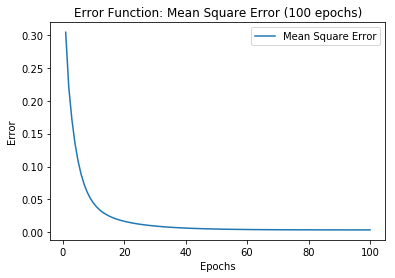

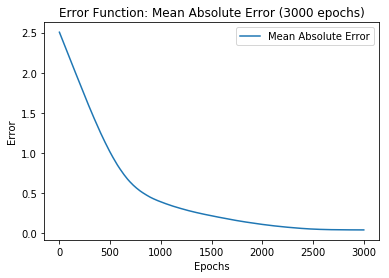

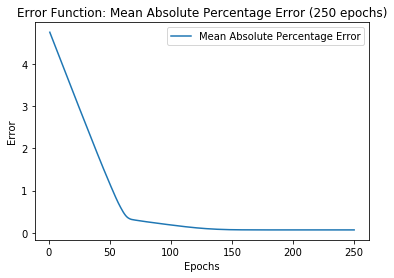

In [9]:
df1 = pd.DataFrame({'Mean Square Error': errs_mse}, index=its_mse)
lines1 = df1.plot.line()
lines1.set_title('Error Function: Mean Square Error (100 epochs)')
lines1.set_xlabel('Epochs')
lines1.set_ylabel('Error')

df2 = pd.DataFrame({'Mean Absolute Error': errs_mae}, index=its_mae)
lines2 = df2.plot.line()
lines2.set_title('Error Function: Mean Absolute Error (3000 epochs)')
lines2.set_xlabel('Epochs')
lines2.set_ylabel('Error')

df3 = pd.DataFrame({'Mean Absolute Percentage Error': errs_mape}, index=its_mape)
lines3 = df3.plot.line()
lines3.set_title('Error Function: Mean Absolute Percentage Error (250 epochs)')
lines3.set_xlabel('Epochs')
lines3.set_ylabel('Error')

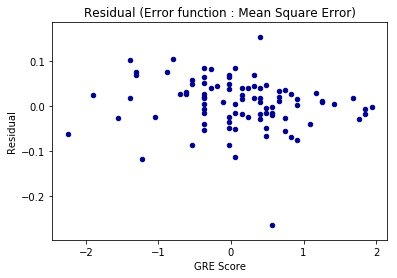

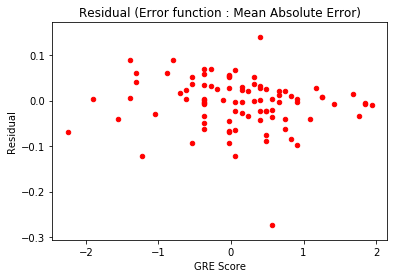

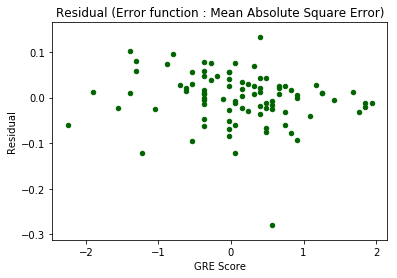

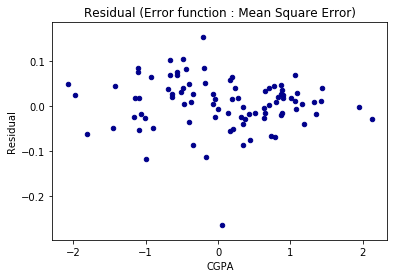

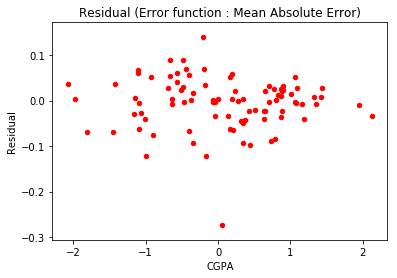

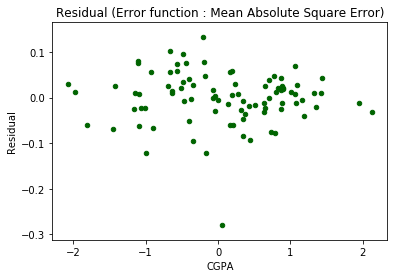

In [31]:
ax1 = res_df_mse.plot.scatter(x='GRE Score', y='Residual', c='DarkBlue')
ax1.set_title('Residual (Error function : Mean Square Error)')
ax2 = res_df_mae.plot.scatter(x='GRE Score', y='Residual', c='Red')
ax2.set_title('Residual (Error function : Mean Absolute Error)')
ax3 = res_df_mape.plot.scatter(x='GRE Score', y='Residual', c='DarkGreen')
ax3.set_title('Residual (Error function : Mean Absolute Square Error)')
ax4 = res_df_mse.plot.scatter(x='CGPA', y='Residual', c='DarkBlue')
ax4.set_title('Residual (Error function : Mean Square Error)')
ax5 = res_df_mae.plot.scatter(x='CGPA', y='Residual', c='Red')
ax5.set_title('Residual (Error function : Mean Absolute Error)')
ax6 = res_df_mape.plot.scatter(x='CGPA', y='Residual', c='DarkGreen')
ax6.set_title('Residual (Error function : Mean Absolute Square Error)')
